# Clusterização - Classificação Não Supervisionada

In [1]:
import pandas as pd, numpy as np
import sklearn.cluster, sklearn.preprocessing
import matplotlib, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lendo o dataset mosn - Most Online Social Network
df = pd.read_csv('mosn.csv', thousands=',',
                   names=('Name', 'Description', 'Date', 'Registered Users',
                          'Registration', 'Alexa Rank'))
columns = ['Registered Users', 'Alexa Rank']
df.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
0,43 Things,Goal setting and achievement,1 January 2005,3000000.0,Closed,12914.0
1,Academia.edu,Social networking site for academics/researchers,September 2008,18000000.0,Open,824.0
2,About.me,Social networking site,October 2009,5000000.0,Open,1447.0
3,Advogato,Free and open source software developers,1999,13575.0,Open,292620.0
4,aNobii,Books,2006,NaN,Open,26939.0


# Pré-processamento

In [3]:
# Elimina linhas com dados "missing" (faltosos-Nulos) e zeros
df2 = df[np.log(df[columns]).notnull().all(axis=1)].copy()
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
0,43 Things,Goal setting and achievement,1 January 2005,3000000.0,Closed,12914.0
1,Academia.edu,Social networking site for academics/researchers,September 2008,18000000.0,Open,824.0
2,About.me,Social networking site,October 2009,5000000.0,Open,1447.0
3,Advogato,Free and open source software developers,1999,13575.0,Open,292620.0
6,aSmallWorld,European jet set and social elite world-wide,March 2004,550000.0,Invite-only,580060.0


# Clusterização

In [4]:
# aplicar o algoritmo de clusterização
kmeans = sklearn.cluster.KMeans()
kmeans.fit(np.log(df2[columns]))
df2["Clusters"] = kmeans.labels_
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
# acessando a tupla que contém o Facebook
fb = df2.set_index('Name').ix['Facebook']['Clusters']
df2.iloc[fb,:]

Name                                                Advogato
Description         Free and open source software developers
Date                                                    1999
Registered Users                                       13575
Registration                                            Open
Alexa Rank                                            292620
Clusters                                                   5
Name: 3, dtype: object

In [6]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,3000000.0,Closed,12914.0,6
1,Academia.edu,Social networking site for academics/researchers,September 2008,18000000.0,Open,824.0,2
2,About.me,Social networking site,October 2009,5000000.0,Open,1447.0,0
3,Advogato,Free and open source software developers,1999,13575.0,Open,292620.0,5
6,aSmallWorld,European jet set and social elite world-wide,March 2004,550000.0,Invite-only,580060.0,4


In [ ]:
# Plotar usando o pacote ggplot2
matplotlib.style.use("ggplot")
#%matplotlib inline
#fig, ax = plt.subplots(figsize=(12, 10))

#ax.subplots(figsize=(12, 10))

# Display the results

#fig, ax = plt.subplots()
#ax = fig.add_subplot(1,1,1)
#ax.df2.plot.scatter(columns[0], columns[1], c="Clusters", 
#                       cmap=plt.cm.Accent, s=100)


plt.title("Sites de Redes Sociais")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(10**3, 10**10)
#plt.ylim(0, 10**7)

#grid = range(10**3, 10**10)
#contours = np.linspace(0, 1, 10)
#plt.contour(grid,levels = contours, colors = ((1,0,0),) )

plt.scatter(df2['Registered Users'], df2['Alexa Rank'], c="Clusters", 
                        s=100)

#plt.
#plt.subplots(figsize=(12, 10))
#plt.figure(figsize=(18,12))


# Annotate the most prominent sites
#def add_abbr(site):
#    if site['Clusters'] == fb:
#        _ = ax.annotate(site["Name"], site[columns], xytext=(1, 5), 
#                        textcoords="offset points", size=8,
#                        color="darkslategrey")
#df2.apply(add_abbr, axis=1)



plt.savefig("RedesSociais.png")
plt.show()

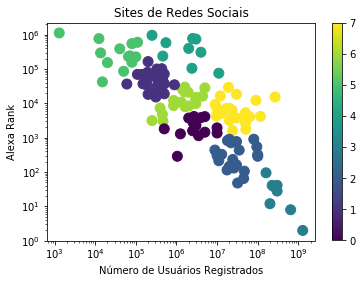

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
colors=['#12efff','#eee111','#eee00f','#e00fff','#123456','#abc222','#000000','#123fff','#1eff1f','#2edf4f','#2eaf9f',
        '#22222f',
        '#eeeff1','#eee112','#00ef00','#aa0000','#0000aa','#000999','#32efff','#23ef68','#2e3f56','#7eef1f','#eeef11']

C=1

x = df2['Registered Users'] 
y = df2['Alexa Rank']
Cluster = df2["Clusters"]    # Labels of cluster 0 to 3



fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=100)

ax.set_xlabel('Número de Usuários Registrados')
ax.set_ylabel('Alexa Rank')
plt.colorbar(scatter)
plt.title("Sites de Redes Sociais")
plt.xscale("log")
plt.yscale("log")
ax.set_aspect('auto')
#plt.figure(figsize=(18,12))
#plt.subplots(figsize=(12, 10))

#fig.show()
plt.show()

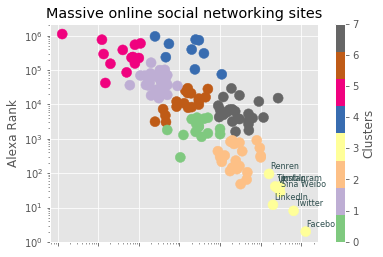

In [46]:
# Select a good-locking style
matplotlib.style.use("ggplot")

# Display the results
ax = df2.plot.scatter(columns[0], columns[1], c="Clusters", 
                       cmap=plt.cm.Accent, s=100)
plt.title("Massive online social networking sites")
plt.xscale("log")
plt.yscale("log")

# Annotate the most prominent sites
def add_abbr(site):
    if site['Clusters'] == fb:
        _ = ax.annotate(site["Name"], site[columns], xytext=(1, 5), 
                        textcoords="offset points", size=8,
                        color="darkslategrey")
df2.apply(add_abbr, axis=1)
#ax.set_aspect('auto')
#ax.set_aspect(.5)
plt.show()